<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Noer Ardiansyah Laksana // Data Science 1 Assigment</font></h1>

#### Import package yang dibutuhkan



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import folium

### Load data yang akan divisualisasi

In [4]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print('Data berhasil terbaca')


Data berhasil terbaca


### Analisis bentuk data yang akan divisualisasi

In [5]:
### bagaimana bentuk data yang akan digunakan?

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


###### Notes pribadi, sebagai pemula saya bingung apa itu value dan berasumsi bahwa value 0 = jumlah kasus terjadi hanya 1

###### namun ternyata anggapan itu salah jadi saya urungkan nilai tersebut

### Saya akan mencoba untuk melihat info dari data ini terelbih dahulu

In [6]:
df.set_index('borough', inplace=True)


In [7]:
df_urut = df.sort_values('year', ascending=False)

###### Ternyata bisa hehehe

In [8]:
df_urut[df_urut['value'] ==+ 1]

,lsoa_code,major_category,minor_category,value,year,month
borough,,,,,,
Tower Hamlets,E01004251,Theft and Handling,Other Theft,1,2016,9
Barking and Dagenham,E01000063,Violence Against the Person,Harassment,1,2016,9
Islington,E01002702,Violence Against the Person,Other violence,1,2016,11
Lewisham,E01003211,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,9
Greenwich,E01033737,Burglary,Burglary in Other Buildings,1,2016,7
...,...,...,...,...,...,...
Sutton,E01004148,Criminal Damage,Criminal Damage To Motor Vehicle,1,2008,9
Merton,E01003357,Burglary,Burglary in a Dwelling,1,2008,5
Redbridge,E01003788,Drugs,Possession Of Drugs,1,2008,12


#### Melakukan Visualasisasi data pertama
## Line Plot

#### Pertanyaan 1

--- Bagaimana kenaikan tingkat kejahatan yang terjadi di kota london dari tahun ke tahun? ----

In [9]:
df_yearxvalue = df_urut.groupby(['year']).sum()[['value']]
df_yearxvalue


,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [10]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

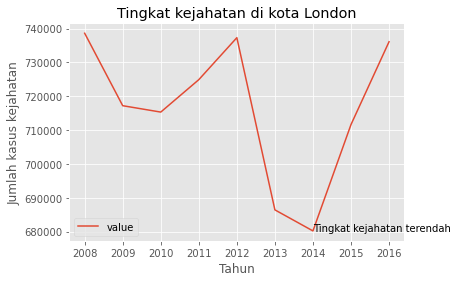

In [11]:

df_yearxvalue.plot();

plt.title("Tingkat kejahatan di kota London");
plt.xlabel("Tahun");
plt.ylabel("Jumlah kasus kejahatan");
#plt.xticks(s_can_haiti.index, rotation=90);

# anotasi suatu kejadian dengan text
plt.text(2014, 680000, "Tingkat kejahatan terendah");


### Insight

Grafik tingkat kejahatan yang terjadi di kota London dari tahun ke tahun memiliki tingkat perubahan yang cukup  menarik, dan cenderung tidak stabil hal tersebut dapat terlihat dari penurunan drastis yang terjadi dari tahun 2012 hingga tahun 2014. Namun, setelah penurunan tersebut disusul dengan kenaikan yang cukup signifikan dari tahun 2014 hingga mencapai titik tertinggi ke 3 pada tahun 2016

#### Question 2

--- Bagaimana perbandingan tingkat kejahatan dari wilayah paling berbahaya dan wilayah paling aman dikota london? ---

Untuk itu saya melakukan proses sortir atau urut terhadap jumlah kasus kejahatan, pada setiap wilayah yang ada di Kota London

In [12]:
df_borough = df_urut.groupby(['borough', 'year']).sum()[['value']]
df_urut_borough = df_borough.sort_values('value', ascending=False)
df_urut_borough


value
borough        year       
Westminster    2012  59226
               2011  54243
               2013  53852
               2009  48456
               2016  48330
...                    ...
City of London 2013    110
               2011     69
               2008      0
               2009      0
               2010      0

[297 rows x 1 columns]

Terlihat pada data tersebut bahwa wilayah paling aman adalah City of London, dan wilayah paling tidak aman adalah Westminster. Namun, data tersebut tidak dapat divisualisasikan dan harus dimanpulasi terlebih dahulu.

In [13]:
df_trans = df_urut_borough.transpose()

In [14]:
df_new = df_urut_borough.sort_values('borough', ascending=False)
df_new

value
borough              year       
Westminster          2012  59226
                     2011  54243
                     2013  53852
                     2009  48456
                     2016  48330
...                          ...
Barking and Dagenham 2012  15990
                     2013  15759
                     2008  17656
                     2014  15426
                     2009  17713

[297 rows x 1 columns]

In [15]:
df_manual = pd.DataFrame([(59226, 54243, 53852, 48456, 48330, 48116, 47846, 47564, 47395),
(178, 157, 151, 115, 110, 69, 0, 0, 0)],
index=['Westminster', 'City of London'],
columns=('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'))

In [16]:
df_manual

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Westminster,59226,54243,53852,48456,48330,48116,47846,47564,47395
City of London,178,157,151,115,110,69,0,0,0


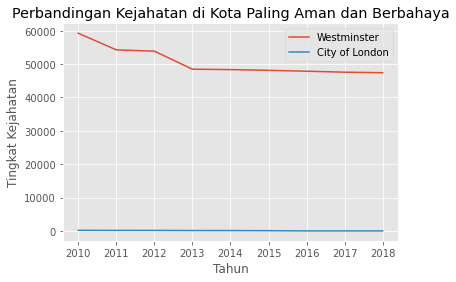

In [17]:
df_manual.T.plot();

plt.title("Perbandingan Kejahatan di Kota Paling Aman dan Berbahaya");
plt.xlabel("Tahun");
plt.ylabel("Tingkat Kejahatan");

##### Insight

Pada grafik diatas terlihat bahwa tingkat kejahatan yang ada di Wilayah Westminster dan City of London sangat berbanding terbalik, terlihat dari tahun 2010 hingga tahun 2018 tingkat kejahatan di kota City of London tidak anak kenaikan.

# Visulisasi dengan Histogram

### Question

--- Berapa nilai jumlah kejahatan yang sering keluar pada seluruh wilayah di Kota London? ---

In [18]:
df_borxvalue = df_urut.groupby(['borough']).sum()[['value']]
df_histo = df_borxvalue.sort_values('value', ascending=False)
df_histo

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


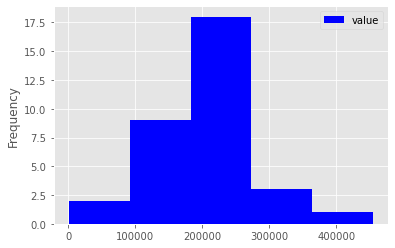

In [19]:

df_histo.plot(kind='hist', bins=5, color='blue');

#### Insight
Dari data histogram diatas bahwa terlihat, nilai tingkat 20.000 - 30.000 menjadi nilai yang paling populer di Kota london.

## Visualisasi dengan Barchart

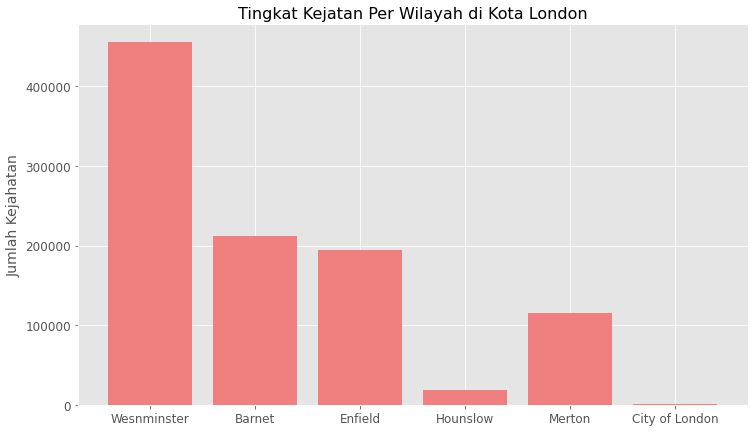

In [20]:
wilayah = ['Wesnminster', 'Barnet', 'Enfield', 'Hounslow', 'Merton', 'City of London']
jumlah_kjhtn = [455028, 212191, 193880, 18772, 115654, 780]

plt.figure(figsize=(12,7))
plt.bar(wilayah, jumlah_kjhtn, color='lightcoral')

plt.title('Tingkat Kejatan Per Wilayah di Kota London', size=16)
plt.ylabel('Jumlah Kejahatan', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

#### Insight
Terlihat bahwa City of London menjadi wilayah paling aman yang ada di Kota London, serta Westminster menjadi wilayah paling berbahaya di Kota London

## Visualisasi dengan Pie Chart

### Question

--- Jenis Kejahatan apa yang paling banyak terjadi di seluruh WIlayah Kota London? ---

In [21]:
df_major = df_urut.groupby(['major_category']).sum()[['value']]
df_minor = df_urut.groupby(['minor_category']).sum()[['value']]

In [22]:
df_major

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [23]:
crime_names = ['Burglary', 'Crimnal Damage', 'Drugs', 'Fraud of Forgery', 'Other', 'Robbery', 'Sexuals', 'Theft', 'Violence Person']
crime_counts = [754293, 630938, 470765, 5325, 106349, 258873, 1273, 2661861, 1558081]
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#CD3333', '#E67F0D' ,'#D53032', '#FFF8DC', '#0000EE')
explode = (0.2, 0.1, 0.1, 0.3, 0.2, 0.05, 0.1, 0.1, 0.1)

Text(0.5, 1.0, 'Diagram Permen Favorit')

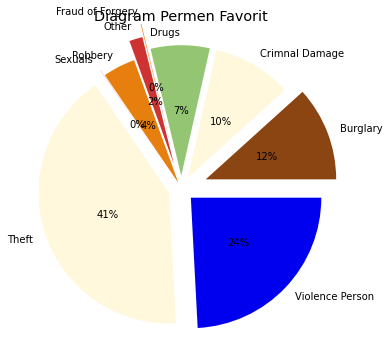

In [24]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(crime_counts, labels = crime_names, autopct='%1.0f%%', colors=colors
       ,explode=explode, pctdistance=0.5)
ax.set_title('Diagram Permen Favorit')

## Insight
Terlihat pada diagram pie diatas bhawa tipe kejahatan Theft atau pecurian/pembegalan menjadi category yang paling banyak terjadi di Kota London.

## Visualisasi dengan Box Plot

--- Bagaimana distribusi normal yang terjadi pada tingkat kejahatan yang terjadi di Kota London, pada rentang 2009 - 2016? ---

<AxesSubplot:>

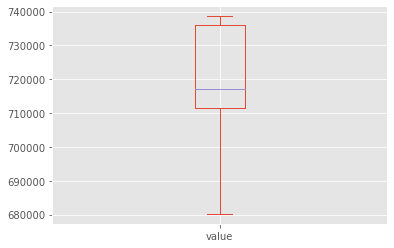

In [25]:
df_yearxvalue.plot(kind = 'box')

### Insight

Terlihat pada box plot tersebut, distribusi normal data jumlah kejahatan yang terjadi di Kota London terjadi pada angka 710.000 hingga 735.000, maka selain itu disebut outlier.

## Visualisasi dengan Scatter Plot

### Question

--- 

KeyError: 'year'

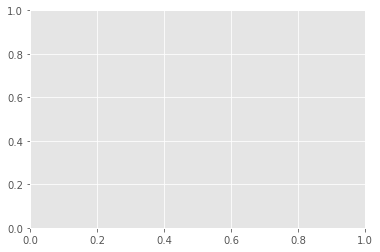

In [26]:
df_yearxvalue.plot(kind='scatter', x='year', y='value');

### Visualisasi Menggunakan Follium Maps


In [27]:
latitude = 51.509865
longitude = -0.118092
sf_map = folium.Map(location=[latitude, longitude], zoom_start=15)

sf_map

In [30]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(df.borough, df.borough):
    incidents.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=6,
            color='red',
            fill='True',
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# tambahkan teks pop-up
latitudes = list(df.borough)
longitudes = list(df.borough)
labels = list(df.major_category)

for lat, long, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, long], popup=label).add_to(sf_map)


sf_map.add_child(incidents)

AttributeError: 'DataFrame' object has no attribute 'borough'

# Permohonan Maaf

Maaf mas afif saya mengerjakan assigment ini, jujur sangat kesulitan dengan bentuk data yang ada. Ditambah kesibukan saya bekerja, dan melanjutkan studi sangat membuat saya hectic. Saya minta maaf apabila banyakk erro dalam assigmnet ini, saya berjanji akan terus belajar.